In [2]:
import geopandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import statsmodels.api as sm
import statsmodels.formula.api as smf
import requests
import io

In [3]:
#How do you read various kinds of files (shapefiles, geopackages, geojsons, locally and from the web).
#reading shapefile after unzipping
df = geopandas.read_file('data/1950-2018-torn-aspath.shp')

#unzipping and reading the same data file in one step
#df = geopandas.read_file("zip://data/1950-2018-torn-aspath.zip")

#reading example geojson file from web, populated places
#url = "https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_50m_populated_places.geojson"
#df2 = geopandas.read_file(url)

#geopackages, Minnesota State Wildlife Management Area Public Facilities 
dfarea = geopandas.read_file('data/struc_dnr_wld_mgmt_areas_pub.gpkg')

df.head()

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,loss,closs,slat,slon,elat,elon,len,wid,fc,geometry
0,1,1950,1,3,1950-01-03,11:00:00,3,MO,29,1,...,6.0,0.0,38.77,-90.22,38.8300,-90.0300,9.5,150,0,"LINESTRING (-90.22000 38.77000, -90.03000 38.8..."
1,2,1950,1,3,1950-01-03,11:55:00,3,IL,17,2,...,5.0,0.0,39.10,-89.30,39.1200,-89.2300,3.6,130,0,"LINESTRING (-89.30000 39.10000, -89.23000 39.1..."
2,3,1950,1,3,1950-01-03,16:00:00,3,OH,39,1,...,4.0,0.0,40.88,-84.58,40.8801,-84.5799,0.1,10,0,"LINESTRING (-84.58000 40.88000, -84.57990 40.8..."
3,4,1950,1,13,1950-01-13,05:25:00,3,AR,5,1,...,3.0,0.0,34.40,-94.37,34.4001,-94.3699,0.6,17,0,"LINESTRING (-94.37000 34.40000, -94.36990 34.4..."
4,5,1950,1,25,1950-01-25,19:30:00,3,MO,29,2,...,5.0,0.0,37.60,-90.68,37.6300,-90.6500,2.3,300,0,"LINESTRING (-90.68000 37.60000, -90.65000 37.6..."


In [4]:
#How do I Calculate a Field?
#remember pandas still applies in geopandas
#example of creating new field of how many years ago the tornado was
df['years_ago'] = 2020 - df['yr']
df.head()

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,closs,slat,slon,elat,elon,len,wid,fc,geometry,years_ago
0,1,1950,1,3,1950-01-03,11:00:00,3,MO,29,1,...,0.0,38.77,-90.22,38.8300,-90.0300,9.5,150,0,"LINESTRING (-90.22000 38.77000, -90.03000 38.8...",70
1,2,1950,1,3,1950-01-03,11:55:00,3,IL,17,2,...,0.0,39.10,-89.30,39.1200,-89.2300,3.6,130,0,"LINESTRING (-89.30000 39.10000, -89.23000 39.1...",70
2,3,1950,1,3,1950-01-03,16:00:00,3,OH,39,1,...,0.0,40.88,-84.58,40.8801,-84.5799,0.1,10,0,"LINESTRING (-84.58000 40.88000, -84.57990 40.8...",70
3,4,1950,1,13,1950-01-13,05:25:00,3,AR,5,1,...,0.0,34.40,-94.37,34.4001,-94.3699,0.6,17,0,"LINESTRING (-94.37000 34.40000, -94.36990 34.4...",70
4,5,1950,1,25,1950-01-25,19:30:00,3,MO,29,2,...,0.0,37.60,-90.68,37.6300,-90.6500,2.3,300,0,"LINESTRING (-90.68000 37.60000, -90.65000 37.6...",70


In [5]:
#How do you save the data?
#saves the edited shapefile
df.to_file('tornadodataaltered.shp')

In [6]:
#we can then open this new file and stop using the outdated one
df = geopandas.read_file('tornadodataaltered.shp')
df.head()

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,closs,slat,slon,elat,elon,len,wid,fc,years_ago,geometry
0,1,1950,1,3,1950-01-03,11:00:00,3,MO,29,1,...,0.0,38.77,-90.22,38.8300,-90.0300,9.5,150,0,70,"LINESTRING (-90.22000 38.77000, -90.03000 38.8..."
1,2,1950,1,3,1950-01-03,11:55:00,3,IL,17,2,...,0.0,39.10,-89.30,39.1200,-89.2300,3.6,130,0,70,"LINESTRING (-89.30000 39.10000, -89.23000 39.1..."
2,3,1950,1,3,1950-01-03,16:00:00,3,OH,39,1,...,0.0,40.88,-84.58,40.8801,-84.5799,0.1,10,0,70,"LINESTRING (-84.58000 40.88000, -84.57990 40.8..."
3,4,1950,1,13,1950-01-13,05:25:00,3,AR,5,1,...,0.0,34.40,-94.37,34.4001,-94.3699,0.6,17,0,70,"LINESTRING (-94.37000 34.40000, -94.36990 34.4..."
4,5,1950,1,25,1950-01-25,19:30:00,3,MO,29,2,...,0.0,37.60,-90.68,37.6300,-90.6500,2.3,300,0,70,"LINESTRING (-90.68000 37.60000, -90.65000 37.6..."


In [7]:
#How can you export to a CSV? To an Excel file?
#export to csv file
#directory and name of file created
df.to_csv('data/changedtornadocsv.csv')

In [8]:
#export to xlsx
#directory and name of file created
df.to_excel('data/changedtornadoexcel.xlsx')

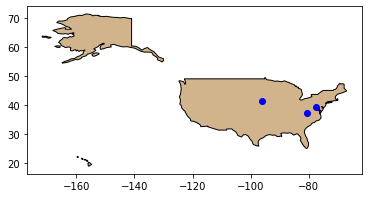

In [9]:
#How do I take a CSV that includes latitude and longitude, and turn it into a GeoDataFrame?
#create lat and long points then make excel file out of them
df4 = pd.DataFrame(
    {'City': ['Omaha', 'Blacksburg', 'Leesburg'],
     'Latitude': [41.26, 37.23, 39.16],
     'Longitude': [-95.93, -80.41, -77.56]})
df4.to_csv('towncoordinates.csv',index=False)
#open the created excel file
df5 = geopandas.read_file('towncoordinates.csv')
#create geometry for the lat and long points
gdf = geopandas.GeoDataFrame(
    df5, geometry=geopandas.points_from_xy(df5.Longitude, df5.Latitude))
#display on map to check if done properly
#world basemap
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
#only need North America for the points
ax = world[world.name=='United States of America'].plot(
    color='tan', edgecolor='black')
#Put points into geodataframe
gdf.plot(ax=ax, color='blue')

plt.show()

In [10]:
#How do I join data with geopandas?
#open two seperate files to be joined together
#geodata
df = geopandas.read_file('tornadodataaltered.shp')
#we will join a simple file that has full state names from github
#code found on stack overflow to alleviate issues when getting data from url
url="https://raw.githubusercontent.com/jasonong/List-of-US-States/master/states.csv"
s=requests.get(url).content
df2=pd.read_csv(io.StringIO(s.decode('utf-8')))

#the merge, joining based on the two letter abbreviations of states that are labeled st on df and Abbreviation on df2
df3 = df.merge(df2, how='left',left_on='st',right_on='Abbreviation')
df3.head()
#We now see the full state names and abbreviations at the far right of the data
       
    
    
    #failed attempt to join two geodataframes#
#df2 = geopandas.read_file('data/1950-2018-torn-initpoint.shp')
#we now have the tornado lines and initial points
#these lines would overwrite the data of the df being merged on, because the columns are all the same
#we would need to use a spatial join for these two data sets
###df = df.merge(df2,how='left',left_on='om',right_on='om')
####df.head(10)

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,slon,elat,elon,len,wid,fc,years_ago,geometry,State,Abbreviation
0,1,1950,1,3,1950-01-03,11:00:00,3,MO,29,1,...,-90.22,38.8300,-90.0300,9.5,150,0,70,"LINESTRING (-90.22000 38.77000, -90.03000 38.8...",Missouri,MO
1,2,1950,1,3,1950-01-03,11:55:00,3,IL,17,2,...,-89.30,39.1200,-89.2300,3.6,130,0,70,"LINESTRING (-89.30000 39.10000, -89.23000 39.1...",Illinois,IL
2,3,1950,1,3,1950-01-03,16:00:00,3,OH,39,1,...,-84.58,40.8801,-84.5799,0.1,10,0,70,"LINESTRING (-84.58000 40.88000, -84.57990 40.8...",Ohio,OH
3,4,1950,1,13,1950-01-13,05:25:00,3,AR,5,1,...,-94.37,34.4001,-94.3699,0.6,17,0,70,"LINESTRING (-94.37000 34.40000, -94.36990 34.4...",Arkansas,AR
4,5,1950,1,25,1950-01-25,19:30:00,3,MO,29,2,...,-90.68,37.6300,-90.6500,2.3,300,0,70,"LINESTRING (-90.68000 37.60000, -90.65000 37.6...",Missouri,MO


<AxesSubplot:>

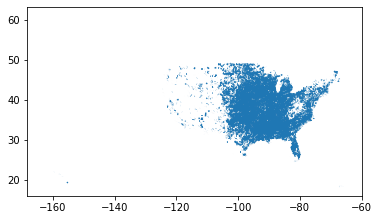

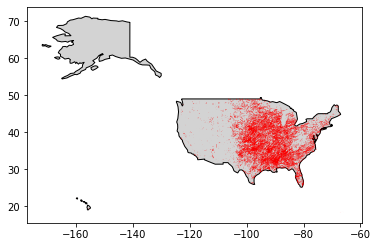

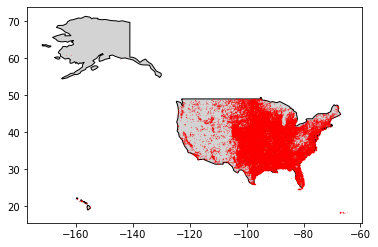

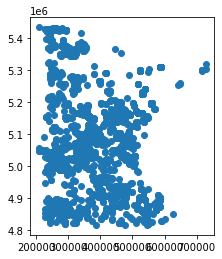

In [11]:
#How can I create plots of my data (points, lines, and polygons)?  (Don’t worry about niceness of appearance! We’ll get to that later.)
#very simple plot of tornado lines
df3.plot()

#spruce up map
#create basemap
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
#only need North America for the points
ax = world[world.name=='United States of America'].plot(
    color='lightgray', edgecolor='black')
#changed linewidth to better see tracks
df3.plot(ax=ax, color='red', linewidth=0.3)

#create another map of the tornado points instead of lines, the same as mapping the lines
df4 = geopandas.read_file('data/1950-2018-torn-initpoint.shp')
#we now have the intitial points to map
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
#only need North America for the points
ax = world[world.name=='United States of America'].plot(
    color='lightgray', edgecolor='black')
#make sure to change point size for better visibility
df4.plot(ax=ax, color='red',markersize=0.01)

#last one for an area map, almost exactly the same steps needed
#this is minnesota wildlife managed area
dfarea.plot()

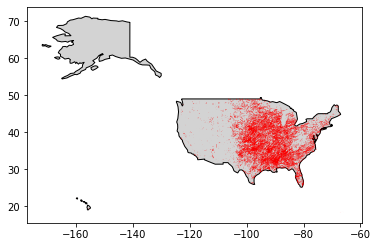

In [12]:
#How do I save those plots to disk?
#remake one of the maps
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
ax = world[world.name=='United States of America'].plot(
    color='lightgray', edgecolor='black')
df3.plot(ax=ax, color='red', linewidth=0.3)

#now save map to directory
plt.savefig('tornadotracks.png', dpi = 300)

<ipython-input-33-2c142b7be2ec>:6: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df3.buffer(distance=0.05).plot(cmap="jet")


<AxesSubplot:>

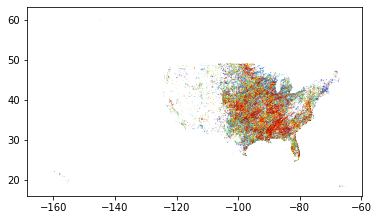

In [33]:
#How can I apply a buffer in geopandas?
#create buffer around points to better highlight them or show areas nearby some data
#first we will change the projection to UTM using epsg code
df3 = df3.to_crs(epsg=4269)
#the buffer
df3.buffer(distance=0.05).plot(cmap="jet")

           om    yr  mo  dy        date      time  tz  st  stf  stn  ...  \
0           1  1950   1   3  1950-01-03  11:00:00   3  MO   29    1  ...   
4           5  1950   1  25  1950-01-25  19:30:00   3  MO   29    2  ...   
132       133  1950   6   9  1950-06-09  13:00:00   3  MO   29    3  ...   
139       140  1950   6  15  1950-06-15  01:00:00   3  MO   29    4  ...   
169       170  1950   7  19  1950-07-19  16:00:00   3  MO   29    5  ...   
...       ...   ...  ..  ..         ...       ...  ..  ..  ...  ...  ...   
63581  616961  2018  12   1  2018-12-01  00:40:00   3  MO   29    0  ...   
63582  616962  2018  12   1  2018-12-01  00:41:00   3  MO   29    0  ...   
63583  616963  2018  12   1  2018-12-01  00:47:00   3  MO   29    0  ...   
63584  616964  2018  12   1  2018-12-01  01:22:00   3  MO   29    0  ...   
63586  616966  2018  12   1  2018-12-01  01:37:00   3  MO   29    0  ...   

          slon     elat     elon   len  wid  fc  years_ago  \
0     -90.2200  38.8300 -

<AxesSubplot:>

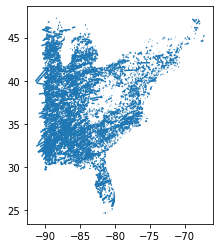

In [106]:
#How can I use both classic Pandas indexing (.loc and .iloc) as well as spatial indexing (.cx) to find data?
df3.head()
#Selecting rows where tornado was in MO
mo = df3.loc[df3.State == 'Missouri']
print(mo)

#select all rows, just state and geometry columns
selected = df3.loc[:,['State','geometry']]
print(selected)

#iloc
#select last three rows/last three columns of data
info = df3.iloc[-3:, -3:]
print(info)


#select based on the lat and long
#select only the eastern part of united states
#cutoff at -90 w long and 20 n lat
east = df3.cx[-90:, 20:]
east.plot()

,geometry,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON
STATEFP,,,,,,,,,,,,
51,"POLYGON ((-79.34312 36.54159, -79.34316 36.541...",700,032132,51700032132,321.32,Census Tract 321.32,G5020,S,2552457,0,+37.1475176,-076.5212499


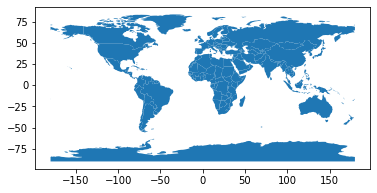

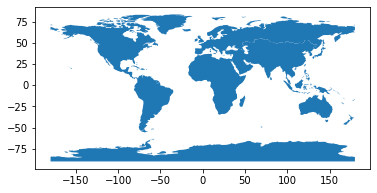

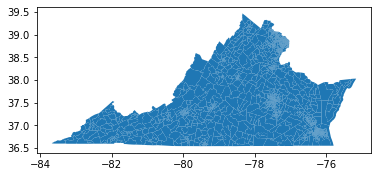

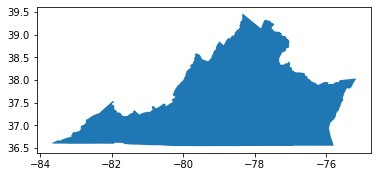

In [44]:
#Can you demonstrate a “group” operation with Pandas syntax? Can you do a spatial “group” using .dissolve?
#example found using the natural res data
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.plot()
#fields we wish to keep
world = world[['continent', 'geometry']]
#getting rid of countries so we only have continents
continents = world.dissolve(by='continent')
continents.plot()

#trying one with Virginia county boundaries
new = geopandas.read_file('data/tl_2019_51_tract.shp')
new.plot()
#dissolve so that we only see the state boundary
states = new.dissolve(by='STATEFP')
states.plot()
states.head()